# Project 2
## Clustering
### Team:
- Varun Chhangani 2019121011
- Shivaan Sehgal 2018111026

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import sklearn
import re
import datetime
import dateutil.parser
import statistics
import seaborn as sns

import matplotlib.pyplot as plt 
from sklearn.decomposition import PCA 
from sklearn.cluster import AgglomerativeClustering 
from sklearn.preprocessing import StandardScaler, normalize 
from sklearn.metrics import silhouette_score 
import scipy.cluster.hierarchy as shc 
from sklearn.cluster import DBSCAN
import copy



### Data Cleaning
* First we cleaned the data by removing coloums and rows with NaN depending on number of occrence of it
* Next we tried to convert non numeric data to numeric one as much as possible (eg. left and right foot to '0' and '1'. And removed coloums as Name,Images,Flag etc.
* Further we converted all the string numerical data to float or int (eg. Income form €3M to 3000000)

In [2]:
df = pd.read_csv('football_data.csv')

In [3]:
df

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,18202,238813,J. Lundstram,19,https://cdn.sofifa.org/players/4/19/238813.png,England,https://cdn.sofifa.org/flags/14.png,47,65,Crewe Alexandra,...,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,€143K
18203,18203,243165,N. Christoffersson,19,https://cdn.sofifa.org/players/4/19/243165.png,Sweden,https://cdn.sofifa.org/flags/46.png,47,63,Trelleborgs FF,...,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,€113K
18204,18204,241638,B. Worman,16,https://cdn.sofifa.org/players/4/19/241638.png,England,https://cdn.sofifa.org/flags/14.png,47,67,Cambridge United,...,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,€165K
18205,18205,246268,D. Walker-Rice,17,https://cdn.sofifa.org/players/4/19/246268.png,England,https://cdn.sofifa.org/flags/14.png,47,66,Tranmere Rovers,...,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,€143K


In [4]:
# remove columns with more than 1000 missing value
a=df.isna().sum()

for x,y in zip(a.index,a):
    if y>1000:
        df=df.drop([x], axis = 1) 

# remove Photo,Flag and Club Logo Link columns
try:
    df=df.drop(['Photo','Flag','Club Logo'],axis=1)
except:
    print("Already Removed")
    
# remove rows with nan data
df = df.dropna(how='any',axis=0) 


In [5]:
df.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Nationality', 'Overall',
       'Potential', 'Club', 'Value', 'Wage', 'Special', 'Preferred Foot',
       'International Reputation', 'Weak Foot', 'Skill Moves', 'Work Rate',
       'Body Type', 'Real Face', 'Position', 'Jersey Number',
       'Contract Valid Until', 'Height', 'Weight', 'Crossing', 'Finishing',
       'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
       'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes'],
      dtype='object')

In [6]:
# Height to Float
def h2f(x):
    x=x.split("\'")
    if len(x)==2:
        return float(x[0])+float(x[1])/12
    else:
        return float(x[0])

df['Height']=df['Height'].apply(h2f)


In [7]:
# Weight to Float


def w2f(x):
    x=x.split('lbs')
    return float(x[0])


df['Weight']=df['Weight'].apply(w2f)

# 1. Data visualisation

###      Histogram for Height, Weight and BMI 

We observe that weight and height does not follow normal distribution perfectly but the BMI follows it much more accurataly.

The avarage BMI of all the players is ~23 and range of BMI is 17.5 to 28, which indicates most of players have normal/healthy BMI.

![image.png](./bmi.png)

.|.
-|-
![image.png](./height.png) | ![image.png](./weight.png)



### Code:

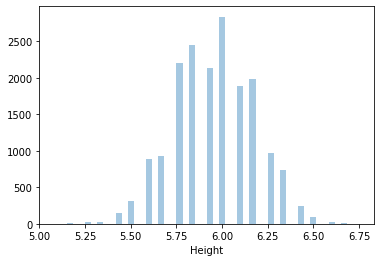

In [8]:
#Heigth
height_data=df['Height']
sns.distplot(height_data.to_numpy(),kde=False,axlabel="Height")


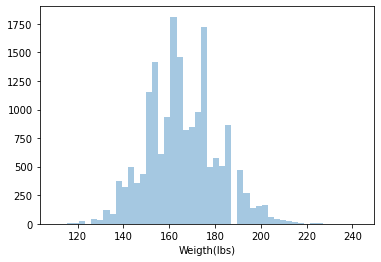

In [9]:

#Weight
weigth_data=df['Weight']
sns.distplot(weigth_data.to_numpy(),kde=False,axlabel="Weigth(lbs)")


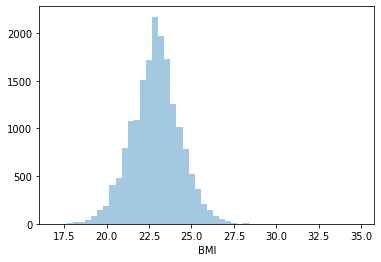

In [10]:
#BMI
bmi=703*(weigth_data.to_numpy())/((12*height_data.to_numpy())**2)
sns.distplot(bmi,kde=False,axlabel="BMI")


### B. Distribution of players in different country 

* The Aglity,balance and Strength of Top 10 performing nations is shown below which shows very similar trends.
![image.png](./abs_nation.png)

* The Age of Players of Top 10 countries. We can see that either top performing coutries are generally younger or only slightly older than the world avarage .
![image.png](./age.png)

* Aggression of Players of Top 10 countries. Its clear top performers are much more aggressive.
![image.png](./aggr.png)



### C. Features of players according to their position.

1. Goal Keepers can be easily identified by their low sprint speed.
2. Both Goal Keeper and Center Back(Defender) have low dribbling skill, which is intututive too as they jusr have to pass the ball forward.
3. Both the striker and Defender have high Jumps which is a nesseasarry skill for scoring and defending a corner.
4. The mid fielders(RM and LM) have high sprint speed as they are require to assist both the front and back. 
5. The Skills are generally independt of left and right posision (exception may be the primary foot)

![image.png](./p1.png)
![image.png](./p2.png)


### Code:

In [11]:
nations = df['Nationality'].unique().tolist()
diction_nation = dict([])
for nation in nations:
    diction_nation[nation] = (df['Nationality'] == nation).sum()
list_nation = list(diction_nation.items())

important_nations = sorted(list_nation,key = lambda x:x[1], reverse = True)[:10]

important_nations = [ x for x,y in important_nations]
impn_data = df[df['Nationality'].isin(important_nations)]

<ipython-input-12-d46b7f5107bf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  impn_data['Unnamed: 0'] = impn_data.index


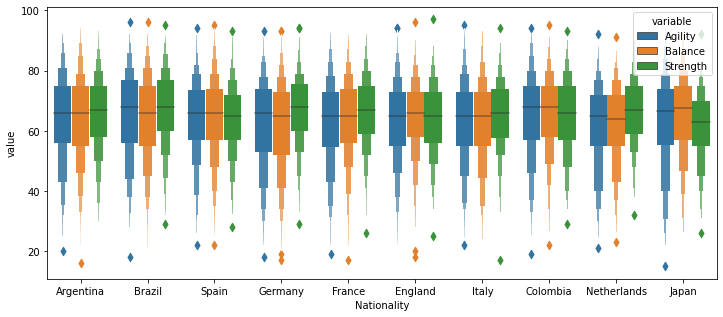

In [12]:
impn_data['Unnamed: 0'] = impn_data.index
impn_plot = impn_data.melt(id_vars='Nationality', value_vars=['Agility', 'Balance','Strength'])

plt.figure(figsize=(12,5))
# sns.lineplot(data=impn_data,y = df['Agility'].mean(), x='Nationality',palette = '#000000')
sns.boxenplot(data=impn_plot,y = 'value',hue='variable', x='Nationality')
plt.show()


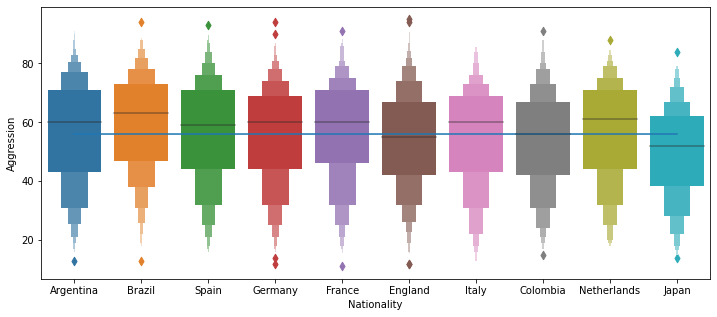

In [13]:

plt.figure(figsize=(12,5))
sns.lineplot(data=impn_data,y = df['Aggression'].mean(), x='Nationality',palette = '#000000')
sns.boxenplot(data=impn_data,y = 'Aggression', x='Nationality')
plt.show()


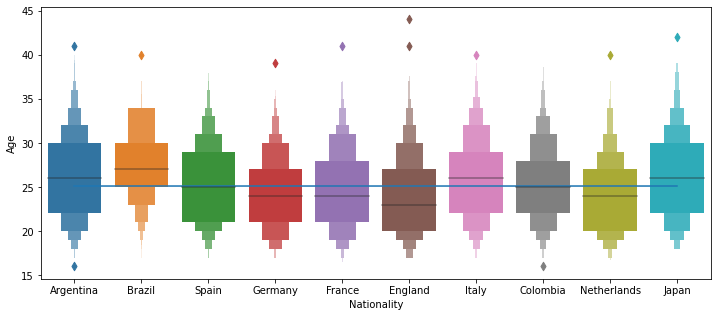

In [14]:
plt.figure(figsize=(12,5))
sns.lineplot(data=impn_data,y = df['Age'].mean(), x='Nationality',palette = '#000000')
sns.boxenplot(data=impn_data,y = 'Age', x='Nationality')
plt.show()


###  Features of players according to their position.

In [15]:
pp=df['Position'].to_numpy()
np.unique(pp)

array(['CAM', 'CB', 'CDM', 'CF', 'CM', 'GK', 'LAM', 'LB', 'LCB', 'LCM',
       'LDM', 'LF', 'LM', 'LS', 'LW', 'LWB', 'RAM', 'RB', 'RCB', 'RCM',
       'RDM', 'RF', 'RM', 'RS', 'RW', 'RWB', 'ST'], dtype=object)

In [16]:
positions = df['Position'].unique().tolist()
diction_position = dict([])
for position in positions:
    diction_position[position] = (pp == position).sum()
list_position = list(diction_position.items())

important_position = sorted(list_position,key = lambda x:x[1], reverse = True)[:10]
print(important_position)
important_position = [ x for x,y in important_position]

[('ST', 2130), ('GK', 1992), ('CB', 1754), ('CM', 1377), ('LB', 1305), ('RB', 1268), ('RM', 1114), ('LM', 1086), ('CAM', 948), ('CDM', 936)]


<ipython-input-17-3ea9def1bfcd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  impn_data['Unnamed: 0'] = impn_data.index


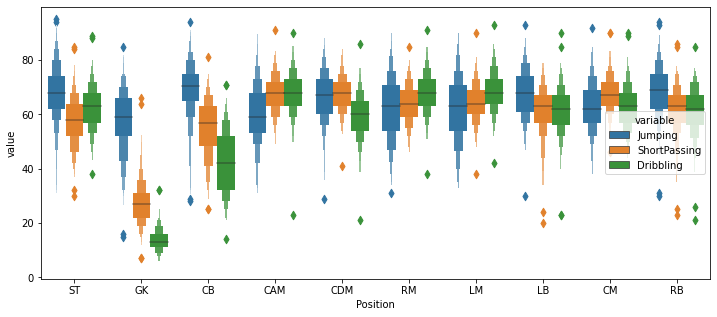

In [17]:
impn_data = df[df['Position'].isin(important_position)]
impn_data['Unnamed: 0'] = impn_data.index
impn_plot = impn_data.melt(id_vars='Position', value_vars=['Jumping', 'ShortPassing','Dribbling'])

plt.figure(figsize=(12,5))
# sns.lineplot(data=impn_data,y = df['Agility'].mean(), x='Nationality',palette = '#000000')
sns.boxenplot(data=impn_plot,y = 'value',hue='variable', x='Position')
plt.show()


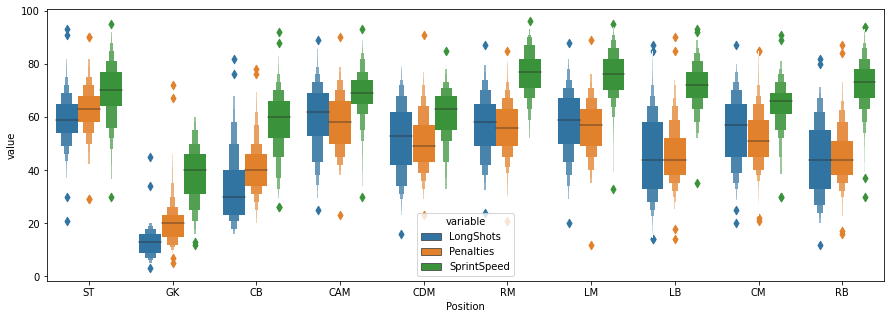

In [18]:

impn_plot = impn_data.melt(id_vars='Position', value_vars=['LongShots', 'Penalties','SprintSpeed'])

plt.figure(figsize=(15,5))
# sns.lineplot(data=impn_data,y = df['Agility'].mean(), x='Nationality',palette = '#000000')
sns.boxenplot(data=impn_plot,y = 'value',hue='variable', x='Position')
plt.show()


### Data Cleaning

In [19]:
def moneytoint(x):
    x=x[1:]
    if x[-1]=='M':
        x=x[:-1]
        x=float(x)
        x*=10**6
    elif x[-1]=='K':
        x=x[:-1]
        x=float(x)
        x*=10**3
    return int(x)

def foottoint(x):
    if x=='Left':
        return -1
    elif x=='Right':
        return 1

ahc_df= df.copy()
#remove Columns with non numerical data
ahc_df=ahc_df.drop(['Unnamed: 0','ID','Name','Nationality','Club','Work Rate','Body Type','Real Face','Position','Jersey Number','Contract Valid Until'],axis=1)
# Money to numbers
ahc_df['Value']=ahc_df['Value'].apply(moneytoint)
ahc_df['Wage']=ahc_df['Wage'].apply(moneytoint)
# foot to num
ahc_df['Preferred Foot']=ahc_df['Preferred Foot'].apply(foottoint)

ahc_df


,Age,Overall,Potential,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,31,94,94,110500000,565000,2202,-1,5.0,4.0,4.0,...,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,33,94,94,77000000,405000,2228,1,5.0,4.0,5.0,...,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,26,92,93,118500000,290000,2143,1,5.0,5.0,5.0,...,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,27,91,93,72000000,260000,1471,1,4.0,3.0,1.0,...,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,27,91,92,102000000,355000,2281,1,4.0,5.0,4.0,...,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,19,47,65,60000,1000,1307,1,1.0,2.0,2.0,...,43.0,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0
18203,19,47,63,60000,1000,1098,1,1.0,2.0,2.0,...,43.0,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0
18204,16,47,67,60000,1000,1189,1,1.0,3.0,2.0,...,55.0,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0
18205,17,47,66,60000,1000,1228,1,1.0,3.0,2.0,...,50.0,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0


In [20]:
# Scaling the data so that all the features become comparable 
scaler = StandardScaler() 
X_scaled = scaler.fit_transform(ahc_df) 
# Normalizing the data so that the data approximately 
# follows a Gaussian distribution 
X_normalized = normalize(X_scaled) 
# Converting the numpy array into a pandas DataFrame 
X_normalized = pd.DataFrame(X_normalized) 
X_normalized



,0,1,2,3,4,5,6,7,8,9,...,36,37,38,39,40,41,42,43,44,45
0,0.035495,0.112797,0.103877,0.540129,0.705776,0.062278,-0.051180,0.276622,0.044898,0.060939,...,0.047464,0.092054,-0.020205,-0.025599,-0.025998,-0.016881,-0.008953,-0.002061,-0.003911,-0.013645
1,0.061343,0.145555,0.134044,0.480895,0.648239,0.083824,0.019982,0.356956,0.057936,0.126670,...,0.084399,0.115606,-0.035212,-0.027998,-0.038672,-0.019726,-0.011553,-0.002660,-0.005046,-0.011525
2,0.006618,0.128574,0.121970,0.712591,0.437466,0.069025,0.019021,0.339789,0.107537,0.120578,...,0.071525,0.107019,-0.035258,-0.037834,-0.020555,-0.014862,-0.015096,-0.002532,-0.002768,-0.010970
3,0.017962,0.158398,0.156331,0.547379,0.500656,-0.020639,0.024379,0.323444,0.003541,-0.079871,...,-0.024135,0.036266,-0.071953,-0.054635,-0.068021,0.184226,0.180237,0.190534,0.186867,0.191274
4,0.014813,0.130625,0.122971,0.646110,0.569692,0.091437,0.020105,0.266732,0.113665,0.079120,...,0.070942,0.093915,0.038135,0.017418,0.009205,-0.003291,-0.007293,-0.024871,-0.013682,-0.007515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17913,-0.212377,-0.451510,-0.167541,-0.068980,-0.065251,-0.173438,0.089457,-0.046842,-0.233386,-0.078033,...,-0.057467,-0.194454,-0.059443,0.002374,0.010374,-0.060687,-0.032452,-0.090912,-0.080019,-0.069750
17914,-0.163250,-0.347067,-0.169480,-0.053023,-0.050157,-0.229032,0.068764,-0.036006,-0.179399,-0.059982,...,-0.044173,-0.182312,-0.158916,-0.188751,-0.156592,-0.046649,-0.054573,-0.054700,-0.083581,-0.032682
17915,-0.266696,-0.380179,-0.096495,-0.058082,-0.054942,-0.205233,0.075324,-0.039441,0.010941,-0.065705,...,0.056339,-0.211696,-0.105174,-0.219411,-0.223037,-0.082114,-0.092235,-0.051603,-0.083496,-0.028156
17916,-0.224847,-0.360068,-0.112500,-0.055010,-0.052036,-0.175847,0.071340,-0.037355,0.010363,-0.062229,...,0.012031,-0.143716,-0.177921,-0.135908,-0.113678,-0.019022,-0.079672,-0.017371,-0.063813,-0.055624


In [21]:
#Dimentionality reduction

pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(X_normalized) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2'] 

X_principal


,P1,P2
0,-0.314680,0.011625
1,-0.377175,-0.047489
2,-0.363745,0.039971
3,0.261014,-0.029879
4,-0.379634,-0.090823
...,...,...
17913,0.641895,0.368045
17914,0.818524,0.349980
17915,0.586944,0.677586
17916,0.566613,0.621295


### D.Outliers

We have reduced the dimention of data using PCA to get a 2D plot.<br>
The Pink Dots are top 3 Players ( Messi, Ronado,Neyamer).<br>
The violet Dots are top 50 Players.<br>
Green are last 100 Players.<br>

![image.png](./pca.png)

One obervation is the top players are around y=0(PC2) and x=-0.33(PC1). <br>
But we cant say something explisitly about a praticular top player as this is dense area.<br>
And least performing players are arround Green Area.

As we were not getting outliers by standard approch ,we decided to follow materialistic approch and ploted players wages and value. And results were as expected.


Value|Wage
-|-
![image.png](./value.png) | ![image.png](./wage.png)


### Code:

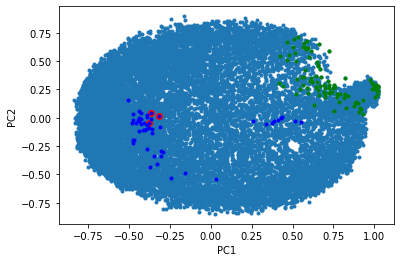

In [22]:
plt.plot(X_principal['P1'], X_principal['P2'],'.')
plt.plot(X_principal['P1'][0], X_principal['P2'][0],'ro')#messi
plt.plot(X_principal['P1'][1], X_principal['P2'][1],'ro')#ronado
plt.plot(X_principal['P1'][2], X_principal['P2'][2],'ro')#neymar
plt.plot(X_principal['P1'][:50], X_principal['P2'][:50],'b.')
plt.plot(X_principal['P1'][-100:], X_principal['P2'][-100:],'g.')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

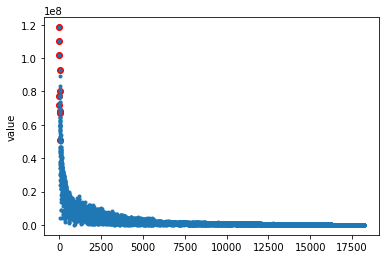

In [23]:
value_data=ahc_df['Value']
plt.plot(value_data[:10],'ro')
plt.plot(value_data,'.')
plt.ylabel('value')
plt.show()

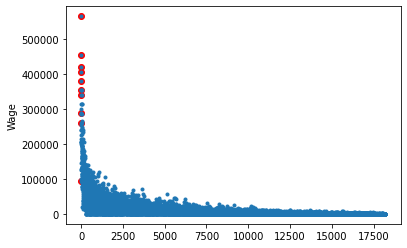

In [24]:
wage_data=ahc_df['Wage']
plt.plot(wage_data[:10],'ro')
plt.plot(wage_data,'.')
plt.ylabel('Wage')
plt.show()

# 2.Analysis from K-means


If we chose k = 3,5,7 we get elbow at 3 and silhouette score is also higest at 3.This indicates apropriate number of clusters is 3.

Elbow | Silhouette
-|-
![image.png](./k-elbow.png) | ![image.png](./k-sil.png)
![image.png](./k-elb.png) | ![image.png](./ks.png)

But when we iterate from k=[2,3...9] we get above values.<br>
Here we see higest silhouette score at k=2 BUT elbow is at k=5. As silhouette score at k=5 is also not that bad k should be 5. <br> 
                                                          


### For K=2
![image.png](./k2.png)
For K=2 it has very clearly divided the data into 2 parts.As most of the good players were on the left side and not so good player were on right.This has divided the data into above avarage and below avarage.


### For K=3 and K=4
Both of these have clear decison boundries.For k=4 the clustring have lost the division at x~0 which was in k=2 and k=3.
k=3|k=4
-|-
![image.png](./k3.png) | ![image.png](./k4.png)



### For K=5
For K=5 it has came up with a sperate cluster in between which looks like a extention to the pattren we observed in top players. with this the last rank playered are also properly clusterd in right.
![image.png](./k5.png)



### For K=6 and K=7
For k=6,7(Higher than 5) the new cluster formed have very less data and are not that significant.<br>
Also the clusters have merged ,epecially for k>=7.
k=6|k=7
-|-
![image.png](./k6.png) | ![image.png](./k7.png)




### Code:

In [25]:
def dist(x1,x2):
    x1 = np.array(x1)
    x2 = np.array(x2)
    assert x1.shape == x2.shape
    
    return np.linalg.norm(x1-x2,2)

In [26]:
class k_means_clustering:
    def __init__(self,k = 2, max_iterations = 100, tolerance = 0.1):
        self.k = k
        self.max_iterations = max_iterations
        self.tolerance = tolerance
    def fit(self, X):
        
        X = X.copy()
        np.random.shuffle(X)
        self.centers = X[:self.k]
        
        for iter_n in range(self.max_iterations):
            self.new_close = list(range(self.k))
            
            for i in range(self.k):
                self.new_close[i] = []
                
            for x in X:
                closest = np.argmin(np.array([ dist(x,self.centers[i]) for i in range(self.k)]))
                self.new_close[closest].append(x)
                
            self.new_centers = self.centers.copy()
            
            for i in range(self.k):
                self.new_centers[i] = np.mean(np.array(self.new_close[i]),axis = 0)

            cf = 0
            for i in range(self.k):
                if dist(self.new_centers[i],self.centers[i]) > self.tolerance:
                    cf = 1
                
            self.centers = self.new_centers.copy()        
            if not cf:
                break
                
    def predict(self, X):
        n = X.shape[0]
        labels = np.zeros(X.shape[0])
        for i in range(n):
            labels[i] = np.argmin(np.array([ dist(X[i],self.centers[j]) for j in range(self.k)]))
        return labels
    
    def inertia(self,X):
        sq_sum=0
        n = X.shape[0]
        for i in range(n):
            sq_sum+=np.min(np.array([ dist(X[i],self.centers[j]) for j in range(self.k)]))
        return sq_sum

In [27]:
score=[]
silhouette_scores = []
K=[1,2,3,4,5,6,7,8,9]
for k in K:
    kmeans = k_means_clustering(k=k)
    kmeans.fit(X_normalized.to_numpy())    
    score.append(kmeans.inertia(X_normalized.to_numpy()))
    if k!=1:
        silhouette_scores.append(silhouette_score(X_normalized, kmeans.predict(X_normalized.to_numpy()))) 
    

In [28]:
score

[17732.854372000613,
 15452.299178161598,
 14475.580880415488,
 13762.921678217685,
 12993.532602364803,
 12581.176473499594,
 12418.902132364285,
 12393.246391720922,
 11970.0630723575]

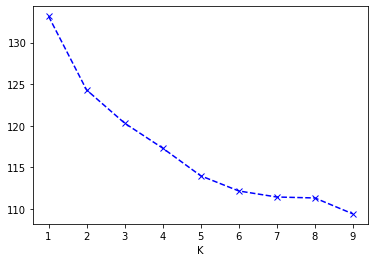

In [29]:
plt.plot(K,np.sqrt(score),'bx--')
plt.xlabel('K')
plt.show()

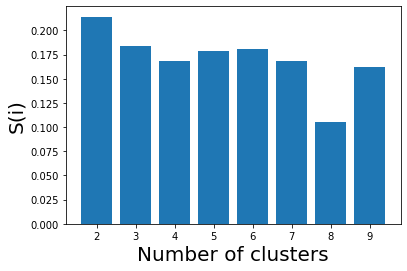

In [30]:
plt.bar(K[1:], silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 20) 
plt.ylabel('S(i)', fontsize = 20) 
plt.show() 

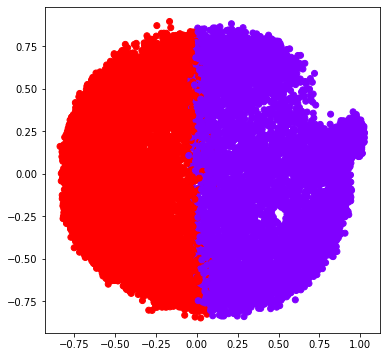

In [31]:
# Visualizing the clustering 
kmeans_2 = k_means_clustering(k=2)
kmeans_2.fit(X_normalized.to_numpy())    
plt.figure(figsize =(6, 6)) 
plt.scatter(X_principal['P1'], X_principal['P2'], 
c = kmeans_2.predict(X_normalized.to_numpy()), cmap ='rainbow') 
plt.show() 


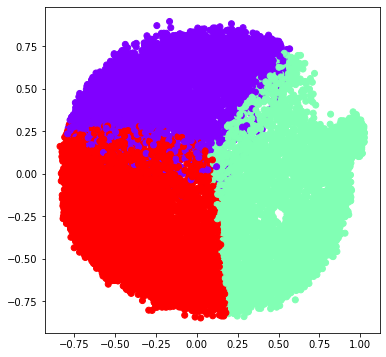

In [32]:
# Visualizing the clustering 
kmeans_3 = k_means_clustering(k=3)
kmeans_3.fit(X_normalized.to_numpy())    
plt.figure(figsize =(6, 6)) 
plt.scatter(X_principal['P1'], X_principal['P2'], 
c = kmeans_3.predict(X_normalized.to_numpy()), cmap ='rainbow') 
plt.show() 


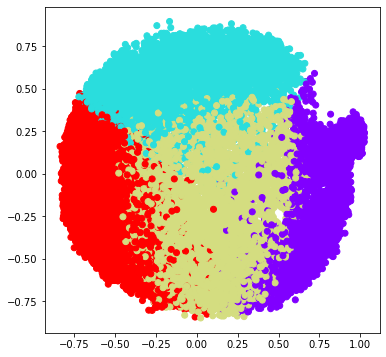

In [33]:
kmeans_4 = k_means_clustering(k=4)
kmeans_4.fit(X_normalized.to_numpy())    
plt.figure(figsize =(6, 6)) 
plt.scatter(X_principal['P1'], X_principal['P2'], 
c = kmeans_4.predict(X_normalized.to_numpy()), cmap ='rainbow') 
plt.show() 


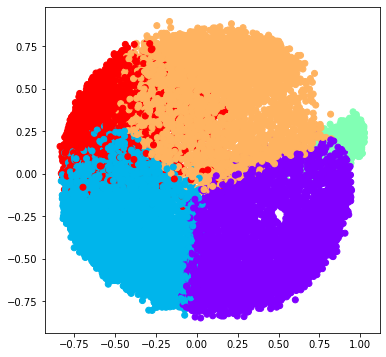

In [34]:
kmeans_5 = k_means_clustering(k=5)
kmeans_5.fit(X_normalized.to_numpy())    
plt.figure(figsize =(6, 6)) 
plt.scatter(X_principal['P1'], X_principal['P2'], 
c = kmeans_5.predict(X_normalized.to_numpy()), cmap ='rainbow') 
plt.show() 


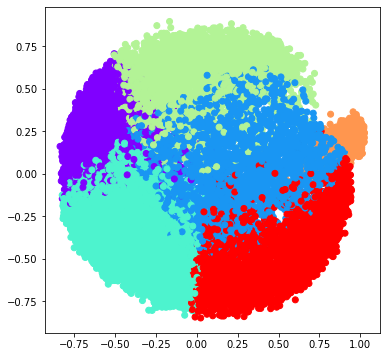

In [35]:
kmeans_6 = k_means_clustering(k=6)
kmeans_6.fit(X_normalized.to_numpy())    
plt.figure(figsize =(6, 6)) 
plt.scatter(X_principal['P1'], X_principal['P2'], 
c = kmeans_6.predict(X_normalized.to_numpy()), cmap ='rainbow') 
plt.show() 


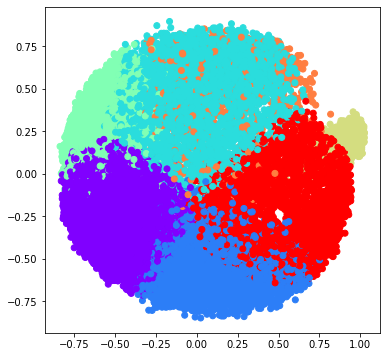

In [36]:
kmeans_7 = k_means_clustering(k=7)
kmeans_7.fit(X_normalized.to_numpy())    
plt.figure(figsize =(6, 6)) 
plt.scatter(X_principal['P1'], X_principal['P2'], 
c = kmeans_7.predict(X_normalized.to_numpy()), cmap ='rainbow') 
plt.show() 


# 3.Hierarchical Clustering

## Agglomerative(bottom-up strategy)
Dendogram|Sil. Score
-|-
![image.png](./agd.png)|![image.png](./ags.png)

Following dendogram suggests that we should have 2 clusters,which is also suggested by Silhouette Score. 
![image.png](./ag2.png)


## Devisive Technique

code attached

analysis lost

code takes too long to run

### Code

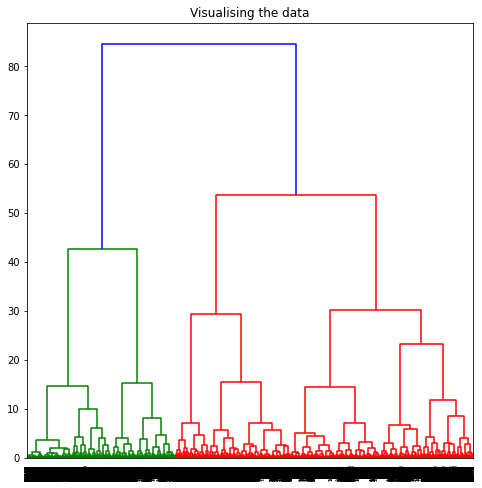

In [37]:
plt.figure(figsize =(8, 8)) 
plt.title('Visualising the data') 
Dendrogram = shc.dendrogram((shc.linkage(X_principal, method ='ward'))) 




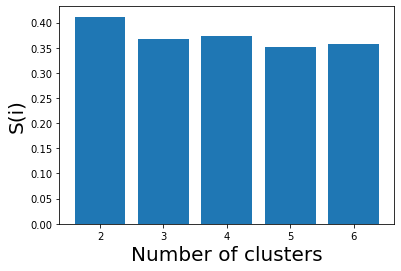

In [39]:
k = [2, 3, 4, 5, 6] 

ac2 = AgglomerativeClustering(n_clusters = 2) 
ac3 = AgglomerativeClustering(n_clusters = 3) 
ac4 = AgglomerativeClustering(n_clusters = 4) 
ac5 = AgglomerativeClustering(n_clusters = 5) 
ac6 = AgglomerativeClustering(n_clusters = 6) 


# Appending the silhouette scores of the different models to the list 
silhouette_scores = [] 
silhouette_scores.append(silhouette_score(X_principal, ac2.fit_predict(X_principal))) 
silhouette_scores.append(silhouette_score(X_principal, ac3.fit_predict(X_principal))) 
silhouette_scores.append(silhouette_score(X_principal, ac4.fit_predict(X_principal))) 
silhouette_scores.append(silhouette_score(X_principal, ac5.fit_predict(X_principal))) 
silhouette_scores.append(silhouette_score(X_principal, ac6.fit_predict(X_principal))) 

# Plotting a bar graph to compare the results 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 20) 
plt.ylabel('S(i)', fontsize = 20) 
plt.show() 


In [40]:
print(silhouette_scores)

[0.411546160594415, 0.36797135920255564, 0.37413073735484115, 0.350472895106475, 0.35731116416879516]


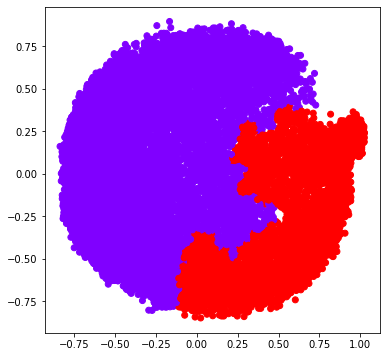

In [42]:
# ac2 = AgglomerativeClustering(n_clusters = 2) 

# Visualizing the clustering 
plt.figure(figsize =(6, 6)) 
plt.scatter(X_principal['P1'], X_principal['P2'], 
c = ac2.fit_predict(X_principal), cmap ='rainbow') 
plt.show() 


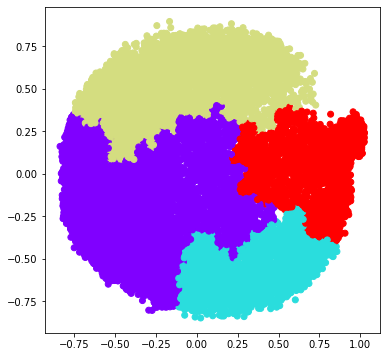

In [41]:
# ac4 = AgglomerativeClustering(n_clusters = 4) 

# Visualizing the clustering 
plt.figure(figsize =(6, 6)) 
plt.scatter(X_principal['P1'], X_principal['P2'], 
c = ac4.fit_predict(X_principal), cmap ='rainbow') 
plt.show() 


### Divisive hierarchical clustering

In [45]:

class DivisiveClustering:
	'''
	Class which implements the DIANA (Divisive Analysis) algorithm and provides an interface for using the implementation.
	'''
	def __init__(self):
		'''
		Initializer for the DivisiveClustering class.
		This function initializes some important class variables.
		'''
		self.clusters={}
		self.dist_matrix=None
		self.mapping=None
		self.no_clusters=0
		self.linkage_matrix=None
		self.n=None
		self.hierarchical_clusters={}
		self.last_index=None

	def initialize(self):
		'''
		Initializer for the DivisiveClustering class.

		Parameters
		----------
		path : string
		    path to file containinng transactions.
		
		Returns
		----------
		transactions : list
			list containing all transactions. Each transaction is a list of
			items present in that transaction.
		items : list
			list containing all the unique items.
		'''
		self.n=len(self.mapping)
		self.last_index=2*self.n-2
		self.i=0
		self.clusters[self.last_index]=list(self.mapping.keys())
		self.linkage_matrix=np.zeros([self.n-1, 4])

	def splinter(self):
		'''
		This function finds the cluster with the largest diameter and finds the splinter element.

		Returns
		----------
		splinter_element : int
			the splinter element. This element will be removed from the cluster that is being split.
		max_diameter_cluster : int
			index of the cluster with the largest diameter. This is the cluster which will be split.
		'''
		cluster_diameters={k:(len(v)<1)*(-1)+(len(v)>1)*np.max(self.dist_matrix[np.ix_(v,v)]) for k,v in self.clusters.items()}
		max_diameter_cluster=max(cluster_diameters, key=cluster_diameters.get)
		avg_within_cluster_distances={pt:(np.sum(self.dist_matrix[np.ix_(self.clusters[max_diameter_cluster], [pt])])/(len(self.clusters[max_diameter_cluster])-1)) for pt in self.clusters[max_diameter_cluster]}
		splinter_element=max(avg_within_cluster_distances, key=avg_within_cluster_distances.get)
		self.no_clusters+=1
		return splinter_element, max_diameter_cluster

	def reassign(self, splinter_element, orig_cluster_key):
		'''
		Function which reassigns points between the original cluster and the splinter cluster.

		Parameters
		----------
		splinter_element : int
		    the splinter element.

		orig_cluster_key : int
		    the ID of the element to be split.

		'''
		# Create temp clusters
		temp_new_cluster=[splinter_element]
		self.clusters[orig_cluster_key].remove(splinter_element)
		temp_orig_cluster=self.clusters[orig_cluster_key]

		# Remove orig cluster from cluster dict
		del self.clusters[orig_cluster_key]

		# Calculate distances
		within_cluster_dist={pt:np.mean(self.dist_matrix[np.ix_(temp_orig_cluster,[pt])]) for pt in temp_orig_cluster }
		dist_to_splinter={pt:self.dist_matrix[pt, splinter_element]  for pt in temp_orig_cluster}
		dist_diff={pt:(within_cluster_dist[pt] - dist_to_splinter[pt]) for pt in temp_orig_cluster} # if +ve, move to splinter
		
		# Reassign points
		for pt in temp_orig_cluster:
			if dist_diff[pt]>0 and len(temp_orig_cluster)>1:
				temp_new_cluster.append(pt)
				temp_orig_cluster.remove(pt)
		
		dist_bw_clusters=np.max(self.dist_matrix[np.ix_(temp_orig_cluster, temp_new_cluster)])
		
		# Add temp clusters to cluster dict
		if len(temp_orig_cluster)==1:
			self.clusters[temp_orig_cluster[0]]=temp_orig_cluster
			orig_cluster_key=temp_orig_cluster[0]
		else:
			self.last_index-=1
			self.clusters[self.last_index]=temp_orig_cluster
			orig_cluster_key=self.last_index

		if len(temp_new_cluster)==1:
			self.clusters[temp_new_cluster[0]]=temp_new_cluster
			new_cluster_key=temp_new_cluster[0]
		else:
			self.last_index-=1
			self.clusters[self.last_index]=temp_new_cluster
			new_cluster_key=self.last_index

		# Append to hierarchical clusters
		self.hierarchical_clusters['iter_'+str(self.no_clusters)]=copy.deepcopy(self.clusters)

		# Make the linkage function
		self.make_linkage_function(new_cluster_key, orig_cluster_key, dist_bw_clusters, len(temp_new_cluster)+len(temp_orig_cluster))

	def make_linkage_function(self, cluster_1, cluster_2, dist, len_cluster_2):
		'''
		Function to create the linakge matrix 'Z' for the dendrogram.

		Parameters
		----------
		cluster_1 : int
		    the ID of the first cluster.
		cluster_2 : string
		    the ID of the first cluster.
		dist : string
		    distance between the newly formed clusters.
		len_cluster_2 : string
		    number of elements in the original cluster which was later split.
		'''
		self.linkage_matrix[self.n-self.no_clusters-1, 0]=cluster_2
		self.linkage_matrix[self.n-self.no_clusters-1, 1]=cluster_1
		self.linkage_matrix[self.n-self.no_clusters-1, 2]=dist
		self.linkage_matrix[self.n-self.no_clusters-1, 3]=len_cluster_2

	def termination(self):
		'''
		Function to check whether clustering has termianted.
		Clustering has terminated when there's only one element in all of the clusters.

		Returns
		----------
		terminated : int (0 or 1)
			function returns 1 on termination. 0 otherwise.
		'''
		for k, v in self.clusters.items():
			if len(v)>1:
				return 0
		return 1

	def fit(self, dist_matrix, mapping):
		'''
		Function that fits the data on the HierarchicalCLustering model.

		Parameters
		----------
		dist_matrix : numpy ndarray
		    the distance matrix.
		mapping : dict
		    mapping of the cluster ids to original names from dataset.
		'''
		self.dist_matrix=dist_matrix
		self.mapping=mapping
		self.initialize()
		while not self.termination():
			splinter_element, orig_cluster_key=self.splinter()
			self.reassign(splinter_element, orig_cluster_key)
		print('Clustering done!')

	def create_dendrogram(self):
		'''
		Function to create the dendrogram using the linakge matrix and save it to file.
		'''
		fig=plt.figure(figsize=(18, 8))
		plt.title("Dendrogram - Divisive Clustering")
		labels=['temp']*len(self.mapping)
		for idx,label in self.mapping.items():
			labels[idx]=label
		labels=np.array(labels)
		dendrogram(self.linkage_matrix, orientation='top', labels=labels)
		fig.savefig('dendrogram_divisive.png')
		plt.show()


In [44]:
from sklearn.metrics.pairwise import euclidean_distances
dist_matrix = euclidean_distances(X_normalized, X_normalized)

In [ ]:
mapping={}
for i in range(0,len(X_normalized)):
    mapping[i]=X_normalized.iloc[i]

model=DivisiveClustering()
model.fit(dist_matrix, mapping)


# 4. DBSCAN

For calulating the epsilon and minPoints we first loop through a number of values for both of them and observed number of clusters formed , ideally they should nither be too high or low.<br>

esp=[0.001,0.01,0.1,1,10,100]<br>
min_samples=[2,10,100,500,1000,2000,4000,8000]<br>


From here we concluded that the values should be of order (0.1,500),<br>

esp=[0.1,0.2,0.3,0.4,0.5]<br>
min_samples=[200,400,800,1600,3200,6400]<br>



Then we looped arround these values and found that (0.4,3200) gives the higest Silhouette Score and number of cluster=2.

![image.png](./dbs.png)

The cluster are well defined and there is no overlaping among them. As stated before low ranked players were in right and good players were in left. DBSCAN have also clustred according to overall above and blow avarage.

### Code:

In [22]:
esp=[0.001,0.01,0.1,1,10,100]
min_samples=[2,10,100,500,1000,2000,4000,8000]

for e in esp:
    for ms in min_samples:
        clustering = DBSCAN(eps=e, min_samples=ms).fit(X_principal)
        core_samples_mask = np.zeros_like(clustering.labels_, dtype=bool) 

        core_samples_mask[clustering.core_sample_indices_] = True
        labels = clustering.labels_ 

        # Number of clusters in labels, ignoring noise if present. 
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0) 

        print(e,ms,n_clusters_) 



0.001 2 350
0.001 10 0
0.001 100 0
0.001 500 0
0.001 1000 0
0.001 2000 0
0.001 4000 0
0.001 8000 0
0.01 2 2068
0.01 10 82
0.01 100 0
0.01 500 0
0.01 1000 0
0.01 2000 0
0.01 4000 0
0.01 8000 0
0.1 2 1
0.1 10 1
0.1 100 1
0.1 500 3
0.1 1000 1
0.1 2000 0
0.1 4000 0
0.1 8000 0
1 2 1
1 10 1
1 100 1
1 500 1
1 1000 1
1 2000 1
1 4000 1
1 8000 1
10 2 1
10 10 1
10 100 1
10 500 1
10 1000 1
10 2000 1
10 4000 1
10 8000 1
100 2 1
100 10 1
100 100 1
100 500 1
100 1000 1
100 2000 1
100 4000 1
100 8000 1


In [23]:
clustering = DBSCAN(eps=0.1, min_samples=500).fit(X_principal)
print(silhouette_score(X_principal, clustering.fit_predict(X_principal)))


0.0531930563956698


In [24]:
esp=[0.1,0.2,0.3,0.4,0.5]
min_samples=[200,400,800,1600,3200,6400]

for e in esp:
    for ms in min_samples:
        clustering = DBSCAN(eps=e, min_samples=ms).fit(X_principal)
        core_samples_mask = np.zeros_like(clustering.labels_, dtype=bool) 

        core_samples_mask[clustering.core_sample_indices_] = True
        labels = clustering.labels_ 

        # Number of clusters in labels, ignoring noise if present. 
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0) 
        if n_clusters_>1:
            print(e,ms,n_clusters_,silhouette_score(X_principal, clustering.fit_predict(X_principal)))
            


0.1 200 2 0.15677546855160315
0.1 400 2 0.20995164046644557
0.2 800 2 0.17184596536886054
0.2 1600 2 0.24794041424868948
0.4 3200 2 0.3593408957359793


In [25]:
clustering = DBSCAN(eps=0.4, min_samples=3200).fit(X_principal)
core_samples_mask = np.zeros_like(clustering.labels_, dtype=bool) 
core_samples_mask[clustering.core_sample_indices_] = True
labels = clustering.labels_ 
  
# Number of clusters in labels, ignoring noise if present. 
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0) 
  
print(n_clusters_) 


2


['y', 'b', 'g', 'r']


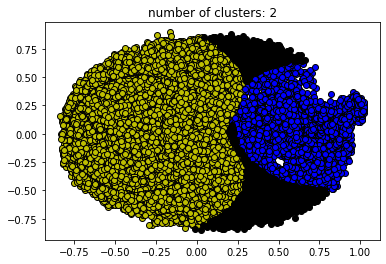

In [26]:
# Black removed and is used for noise instead. 
unique_labels = set(labels) 
colors = ['y', 'b', 'g', 'r'] 
print(colors) 
for k, col in zip(unique_labels, colors): 
    if k == -1: 
        # Black used for noise. 
        col = 'k'
  
    class_member_mask = (labels == k) 
  
    xy = X_principal[class_member_mask & core_samples_mask].to_numpy() 
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col, 
                                      markeredgecolor='k',  
                                      markersize=6) 
  
    xy = X_principal[class_member_mask & ~core_samples_mask].to_numpy() 
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col, 
                                      markeredgecolor='k', 
                                      markersize=6) 
  
plt.title('number of clusters: %d' %n_clusters_) 
plt.show() 